<a href="https://colab.research.google.com/github/ahammedshaneebnk/ML_Linear_Regression_Exercises/blob/main/multi_variate_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question:**

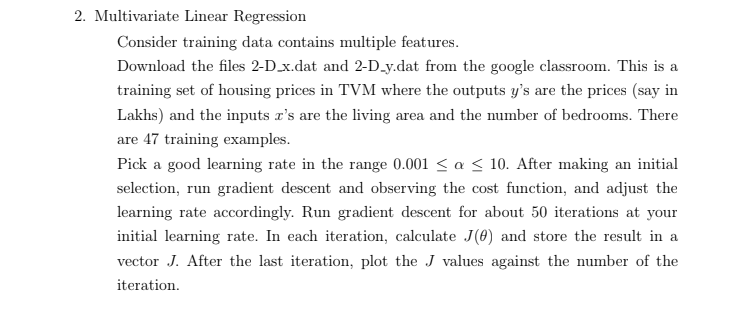

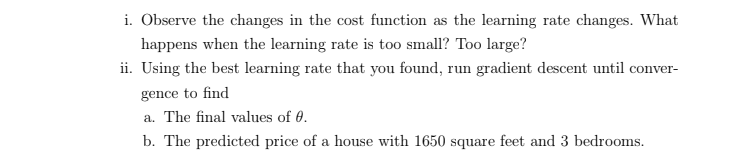

# **Answer:**

## **Data Analysis**

### *Read Data*

In [1]:
# importing libraies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# reading data from the file '2-D_x.dat'
# and converting it into the pandas dataframe
df = pd.read_csv('2-D_x.dat', delim_whitespace=1, header=None)

# reading data from the file '2-D_y.dat' and adding it as another column
# with the existing dataframe with column title 'price'
df['price'] = pd.read_csv('2-D_y.dat', header=None)

# renaming the first two column headers
df.rename(columns={0:'living_area', 1:'n_bedroom'}, inplace=True)

# priting the first 10 instances
print(df.head(10))

   living_area  n_bedroom     price
0       2104.0        3.0  399900.0
1       1600.0        3.0  329900.0
2       2400.0        3.0  369000.0
3       1416.0        2.0  232000.0
4       3000.0        4.0  539900.0
5       1985.0        4.0  299900.0
6       1534.0        3.0  314900.0
7       1427.0        3.0  198999.0
8       1380.0        3.0  212000.0
9       1494.0        3.0  242500.0


### *Basic Details*

In [2]:
df.shape

(47, 3)

* Number of **Rows = 47**
* Number of **Columns = 3**
* Number of **Features = 2**

In [3]:
df.describe()

,living_area,n_bedroom,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


* The basic **statistical details** of the dataset have been shown above.

### *Check for Null Values*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   living_area  47 non-null     float64
 1   n_bedroom    47 non-null     float64
 2   price        47 non-null     float64
dtypes: float64(3)
memory usage: 1.2 KB


* From above, we can conclude that our dataset **does not contain any null value**.

### *Data Visualization*

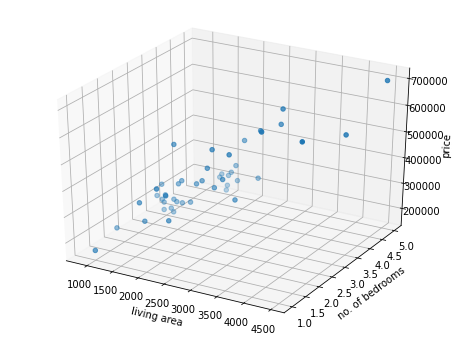

In [5]:
# Scatter 3D Plot
# figure size: 10'x8'
fig = plt.figure(figsize=(8, 6))
x = df['living_area']
y = df['n_bedroom']
z = df['price']
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.set(xlabel='living area', ylabel='no. of bedrooms', zlabel='price')
plt.show()

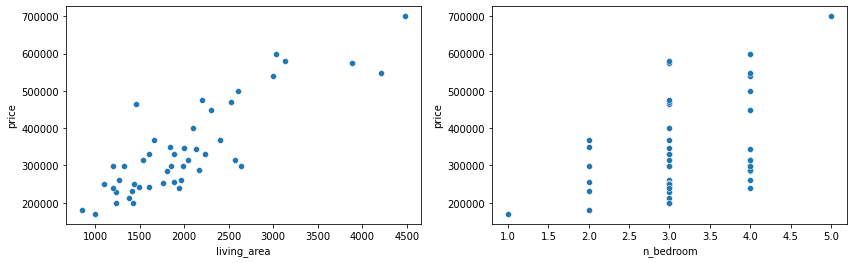

In [6]:
plt.figure(figsize=(14,4))

# living area vs price
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='living_area', y='price')

# no. of bedrooms vs price
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='n_bedroom', y='price')

plt.show()

* As per above plot, it is clear that **as the living area and number of bedrooms increase, the price is also increasing**.
* The relationship between the price and the living area looks like almost linear however, the same kind of linear relationship is not evident in case of the relationship between the number of bedrooms and the price.

### *Correlation Matrix*

In [7]:
# to find correlation between the features and price
# method used is Pearson's as it is a standard method
df.corr(method='pearson')

,living_area,n_bedroom,price
living_area,1.000000,0.559967,0.854988
n_bedroom,0.559967,1.000000,0.442261
price,0.854988,0.442261,1.000000


* The correlation between the living area and price is positive and high as the value is **0.85**.
* The correlation between the number of bedrooms and the price is positive but less as the value is just **0.44**.
* It is observed that there is a **positive and above 0.5 correlation exists between the features themselves which is an undesirable indication as our assumption in linear regression was the features were independent**.
* From the plots and correlation matrix, we can decide that we can proceed with linear regression as an initial (preliminary) study and later non-linear models can be tried out on the dataset for further study.

### *Features' Distribution*

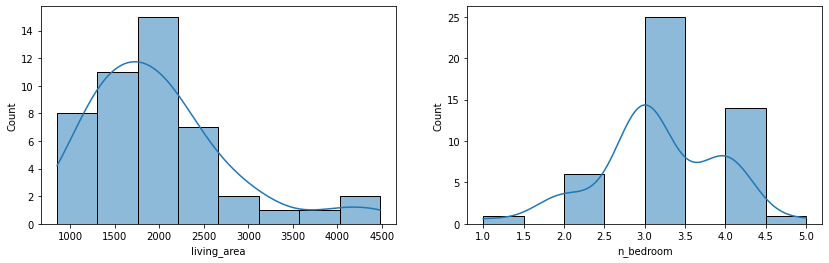

In [8]:
plt.figure(figsize=(14, 4))

# distribution of living area data
plt.subplot(1,2,1)
sns.histplot(data=df, x='living_area', kde=True)

# distribution of no. of bedroom data
plt.subplot(1,2,2)
sns.histplot(data=df, x='n_bedroom', kde=True)

plt.show()

* From above, it is observed that the **living area data is right skewed** and the number of bedroom data is almost normally distributed (with slight left skewness).

### ***Feature Scaling***

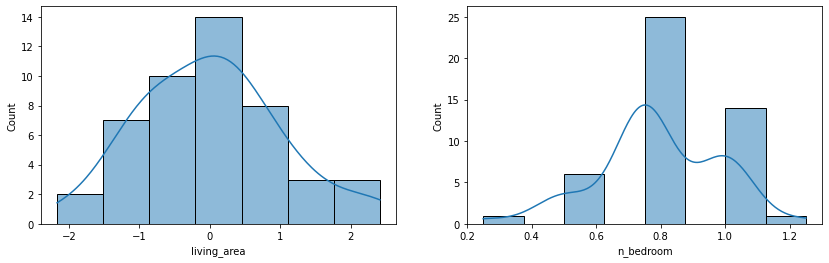

In [9]:
plt.figure(figsize=(14, 4))

# living area
plt.subplot(1,2,1)
# converting into log values to distribute the data normally
x1 = np.log(df['living_area'])
# standardization
X1 = (x1 - np.mean(x1)) / (np.std(x1))
sns.histplot(X1, kde=True)

# number of bedrooms
plt.subplot(1,2,2)
x2 = df['n_bedroom']
# scaling
X2 = x2 / (np.max(x2) - np.min(x2))
sns.histplot(X2, kde=True)

* Since the living area data was clearly right skewed, it has been **transformed by using log function**. After that we have applied standardization. As a result, we obtained a better bell curve and the values are between -2 and +2.
* In case of number of bedroom, we have just **scaled down** the values by dividing the data with the range of the data.

## **Theory**

* The linear regression model in which there are more than one feature is known as **multi-variate** linear regression.
* The **hypothesis** used here in two features linear regression model is $y = h(\theta) = \theta_0+ \theta_1x_1 + \theta_2x_2$
* Here, $'y'$ is the **target variable** (Price) and $'x_1'$ and $'x_2'$ are the **features** (living area and no. of bedrooms respectively).
* The **cost function** used is $J(\theta) = \frac{1}{2n}\sum_{i=1}^{n} (\theta_0 + \theta_1*x_1^i  + \theta_2*x_2^i - y^i)^2$
* We need to find out the parameters, $\theta_0$, $\theta_1$ and $\theta_2$ so that the value of the **cost function $J(\theta)$ is minimum**.
* **Gradient Descent** Algorithm:
* * 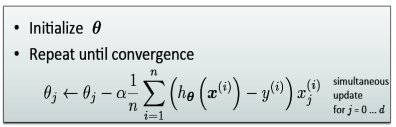
* We will decide whether the **convergance** is attained or not by looking at the difference between the current parameters and their previous values. If the difference is very very less (here, **0.001** is taken), then we will stop the iteration.
* The living area feature has been **transformed** into corresponding **log** values.
* **Standardization** ($\frac{x - \mu}{\sigma}$) has been done to the transformed values in living area feature.
* The values in the number of bedroom feature have been **scaled down** by the **range** ($\frac{x}{max - min}$).
* We have performed the transformation and feature scaling as it will help in a good way in linear regression and to converge gradient descent faster.

## **Gradient Descent Implementation**

### *Initialization*

In [10]:
# parameters are w0, w1, and w2
w0 = 0
w1 = 0
w2 = 0

# number of features
n_f = df.shape[1] - 1

# number of instances
n = df.shape[0]

# Y values are assigned for simplicity
# recalling the features are already in X1 and X2
Y = df.iloc[:, -1]

# cost function values list
J = []

# count variable to track iteration number
count = 0

### *Selection of Learning Rate*

In [11]:
# function to find the predicted value or h
# Arguments: current parameters and feature value
def find_h(theta0, theta1, theta2, x1, x2):
  h = theta0 + theta1*x1 + theta2*x2
  return h

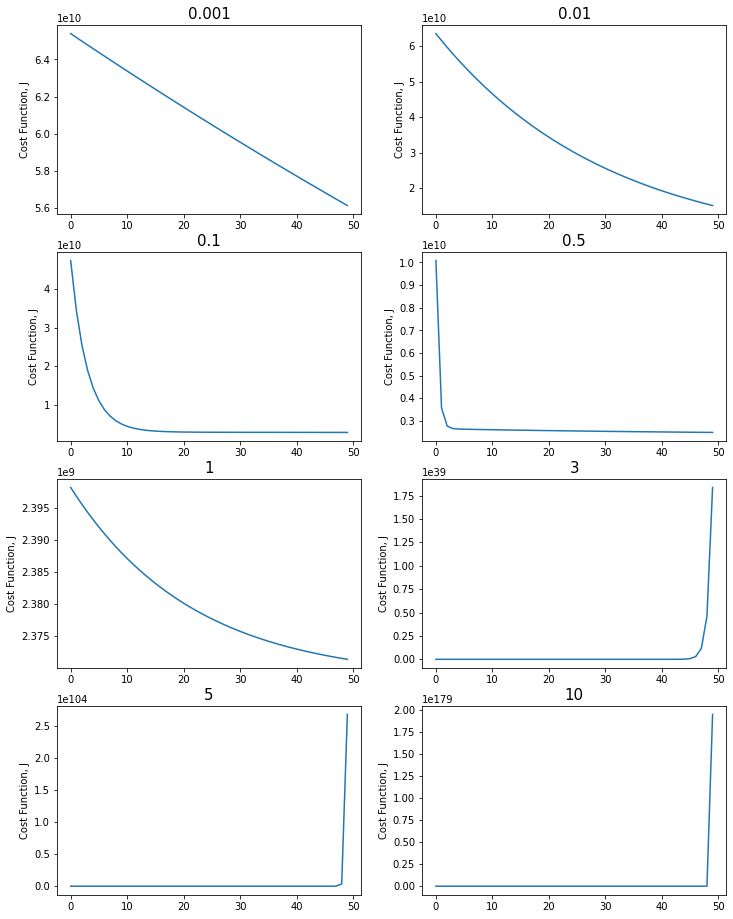

In [12]:
# experimenting learning rates list
lr = [.001, .01, .1, .5, 1, 3, 5, 10]

plt.figure(figsize=(12, 16))

# loop through all learning rates
for i in range(len(lr)):

  J = []
  w0 = 0
  w1 = 0
  w2 = 0

  plt.subplot(4, 2, i+1)

  # iterate 50 times
  for k in range(50):

    # parameters update
    w0 = w0 - lr[i] * (1/n) * np.sum(find_h(w0,w1,w2,X1,X2) - Y)
    w1 = w1 - lr[i] * (1/n) * np.sum(np.multiply(X1, find_h(w0,w1,w2,X1,X2) - Y))
    w2 = w2 - lr[i] * (1/n) * np.sum(np.multiply(X2, find_h(w0,w1,w2,X1,X2) - Y))

    # cost function value
    j = (1/(2*n)) * np.sum(np.square(find_h(w0,w1,w2,X1,X2) - Y))
    J.append(j)

  # plot cost function over iteration  
  plt.plot(J)
  plt.ylabel('Cost Function, J')
  plt.title(label=lr[i], fontsize = 15)

* From above, it is observed that as the learning rate is **very large**, the cost function **diverges** and when the learning rate is **very less**,the cost function is **not at all converging**.
* From above experiment, both learning rates **0.1 and 0.5** are good as they converge the cost function.
* We will **take 0.5** as the learning rate for our further study as it converged faster compared to 0.1, though we can take any value around or between 0.1 and 0.5.

### *Iteration*

In [13]:
# parameters initialization
w0 = 0
w1 = 0
w2 = 0

# learning rate
lr = 0.5

# difference of parameter values list initialization
Diff = []

# cost function values list initializaton
J = []

# initial value of difference is set as infinity
diff = np.inf

# initial value of count for monitoring iteration is set as zero
count = 0

# iterate till the differnce is less than 0.001
while diff > 0.001:

  # update count
  count = count + 1

  # temporary assignments to refer back to calculate the difference
  temp0 = w0
  temp1 = w1
  temp2 = w2

  # parameters updates
  w0 = w0 - lr * (1/n) * np.sum(find_h(w0,w1,w2,X1,X2) - Y)
  w1 = w1 - lr * (1/n) * np.sum(np.multiply(X1, find_h(w0,w1,w2,X1,X2) - Y))
  w2 = w2 - lr * (1/n) * np.sum(np.multiply(X1, find_h(w0,w1,w2,X1,X2) - Y))

  # cost function calculation
  j = (1/(2*n)) * np.sum(np.square(find_h(w0,w1,w2,X1,X2) - Y))
  J.append(j)

  # display the iteration details with parameters information
  print(f"iter = {count}\tJ = {np.round(j, 6)}\tw0 = {np.round(w0, 6)}\tw1 = {np.round(w1, 6)}\tw2 = {np.round(w2, 6)}\tdiff = {np.round(diff, 6)}")
  
  # calculate the difference with the concept of Eucledian distance concept
  diff = np.sqrt((w0 - temp0)**2 + (w1 - temp1)**2 + (w2 - temp2)**2)
  Diff.append(diff)

iter = 1	J = 14841948812.32196	w0 = 170206.329787	w1 = 51244.702469	w2 = 25622.351235	diff = inf
iter = 2	J = 4857101372.635226	w0 = 245155.956559	w1 = 75431.525976	w2 = 37715.762988	diff = 179590.420439
iter = 3	J = 2926760612.045551	w0 = 277838.433904	w1 = 86847.38758	w2 = 43423.69379	diff = 79678.727351
iter = 4	J = 2562465424.921181	w0 = 291917.753189	w1 = 92235.523651	w2 = 46117.761825	diff = 35086.275032
iter = 5	J = 2496272297.587842	w0 = 297889.816722	w1 = 94778.652792	w2 = 47389.326396	diff = 15313.955872
iter = 6	J = 2485090762.914434	w0 = 300371.95721	w1 = 95978.976195	w2 = 47989.488098	diff = 6614.372618
iter = 7	J = 2483530208.954058	w0 = 301375.197417	w1 = 96545.513006	w2 = 48272.756503	diff = 2821.700151
iter = 8	J = 2483462557.803592	w0 = 301764.564882	w1 = 96812.910907	w2 = 48406.455453	diff = 1186.463595
iter = 9	J = 2483546671.745079	w0 = 301906.266849	w1 = 96939.119188	w2 = 48469.559594	diff = 490.901282
iter = 10	J = 2483605589.072638	w0 = 301952.111138	w1 = 96998.

### *Cost Function Plot*

Text(0.5, 1.0, 'learning rate = 0.5')

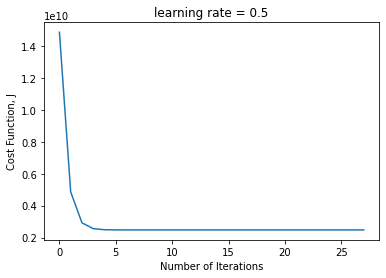

In [14]:
# x axis: iteration
# y axis: cost function value
plt.plot(J)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost Function, J')
plt.title('learning rate = 0.5')

### *Fitted Plane Plot*

In [ ]:
# 3D plot to show the datapoints and the fitted plane
fig = plt.figure(figsize=(8, 6))
ax_3d = plt.axes(projection='3d')
(x_1, x_2) = np.meshgrid(X1, X2)

# datapoints
ax_3d.scatter(X1,X2, Y)
x_3 = find_h(w0,w1,w2,x_1,x_2)
# plane plot
ax_3d.plot_surface(x_1, x_2, x_3)

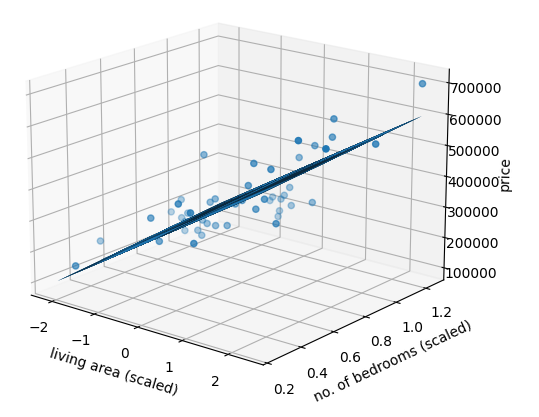

## **Prediction on New Data**

* We need to find out the predicted house price when the living area is **1650** and the number of bedroom is **3**.

In [16]:
# living area assignment
x1t = 1650
# number of bedroom assignment
x2t = 3

# tranformation of living area variable and standardization
x1t_fs = (np.log(x1t) - np.mean(x1)) / np.std(x1)
# scaling the number of bedroom variable
x2t_fs = x2t / (np.max(x2) - np.min(x2))
# predicting and displaying the result
y_pred = find_h(w0, w1, w2, x1t_fs, x2t_fs)
print(f"The predicted house price when the living area = {x1t} \
and the number of bedroom = {x2t} is {y_pred}.")

The predicted house price when the living area = 1650 and the number of bedroom = 3 is 304926.34752590174.


## **Conclusion**

* The given dataset has been studied and analyzed in detail.
* As per the correlation matrix and scatter plots, it was found that even though it is not a best choice, we can use linear regression for a preliminary study of this dataset as there significant dependency between the feature variables (the correlation between the living area and number of bedroom is more than 0.5).
* The living area data distribution was right skewed, therefore it has been transformed into normal distribution by converting into log values.
* Standardization has been done to tranformed living area data to converge the gradient descent faster. The values of number of bedrooms were also scaled down for the same purpose.
* The gradient descent has been run 50 times with different learning rates (.001, .01, 0.1, 1, 3, 5, 10) and the cost function has been plotted to select the best learning rate.
* The cost function was not converging in case of very less learning rates and it was diverging in case of large learning rates. Among the experimented, .1 and .5 were found to be best choices, and 0.5 was selected to carry out the further study.
* The gradient descent was run till the convergence and there were 28 iterations. The convergence criteria was the difference of current values of the parameters and previous values of the same being less than 0.001.
* After final iteration, the values obtained are given below.

```
iter = 28    J = 2483664910.576809    w0 = 301953.249780    w1 = 97051.935698    w2 = 48525.967849    diff = 0.001669
```

* The scatter plot along with the fitted plane were plotted.
* The prediction for the new data has been conducted and the result is as follows.

```
The predicted house price when the living area = 1650 and the number of bedroom = 3 is 304926.34752590174.
```

**Submitted By:**

> Ahammed Shaneeb N K

> M.Tech, Artificial Intelligence

> College of Engineering, Trivandrum, India